In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme()

# Data

The data you will work with consists of student profiles and their math course mark. Manu attributes are available per student:

Feature ID| Feature Name |Description | Type | Values
--|-----|-----|----|---
1 | school | school name | binary | "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira
2 | sex | student's sex | binary | "F" - female or "M" - male
3 | age | student's age | numeric| from 15 to 22
4 | address | home address type | binary | "U" - urban or "R" - rural
5 | famsize | family size | binary | "LE3" - less or equal to 3 or "GT3" - greater than 3
6 | Pstatus | parent's cohabitation status | binary| "T" - living together or "A" - apart
7 | Medu | mother's education |numeric | 0 - none,  1 - 4th grade, 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education
8 | Fedu | father's education |numeric | 0 - none,  1 - 4th grade, 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education
9 | Mjob | mother's job area |categorical | "teacher", "health", "services" (e.g. administrative or police), "at_home" or "other"
10 | Fjob | father's job |categorical | "teacher", "health", "services" (e.g. administrative or police), "at_home" or "other"
11 | reason | reason to choose this school | categorical | close to "home", school "reputation", "course" preference or "other"
12 |guardian | student's guardian | categorical | "mother", "father" or "other"
13 |traveltime | home to school travel time |numeric| 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour
14 |studytime | weekly study time | numeric| 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours
15 |failures | number of past class failures |numeric| n if 1<=n<3, else 4
16 |schoolsup | extra educational support |binary| yes or no
17 |famsup | family educational support |binary| yes or no
18 |paid | extra paid classes in Math |binary| yes or no
19 |activities| extra-curricular activities |binary| yes or no
20 |nursery | attended nursery school|binary| yes or no
21 |higher | wants to take higher education |binary| yes or no
22 |internet | Internet access at home |binary| yes or no
23 |romantic | with a romantic relationship |binary| yes or no
24 |famrel | quality of family relationships |numeric| from 1 - very bad to 5 - excellent
25 |freetime | free time after school |numeric| from 1 - very low to 5 - very high
26 |goout | going out with friends |numeric| from 1 - very low to 5 - very high
27 |Dalc|  workday alcohol consumption |numeric| from 1 - very low to 5 - very high
28 |Walc|  weekend alcohol consumption |numeric| from 1 - very low to 5 - very high
29 |health | current health status |numeric| from 1 - very bad to 5 - very good
30 |absences | number of school absences |numeric| from 0 to 93

## Target variables


Feature ID| Feature Name |Description | Type | Values
--|-----|-----|----|---
31 | G1 | first term grade | numeric | from 0 to 20
32 | G2 | second term grade | numeric | from 0 to 20
33 | G3 | final grade | numeric | from 0 to 20


In [2]:
orig_data = pd.read_csv('student/student-mat.csv', delimiter=';')

In [3]:
orig_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [32]:
np.where(orig_data['absences'] > 3, 'yes', 'no')

array(['yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes',
       'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no',
       'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no',
       'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes',
       'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes',
       'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes',
       'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes',
       'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 

In [34]:
orig_data['was_absent'] = np.where(orig_data['absences'] > 3, 'yes', 'no')

In [35]:
orig_data[['was_absent']].value_counts()

was_absent
yes           204
no            191
dtype: int64

In [36]:
orig_data = orig_data.drop('absences', axis=1)

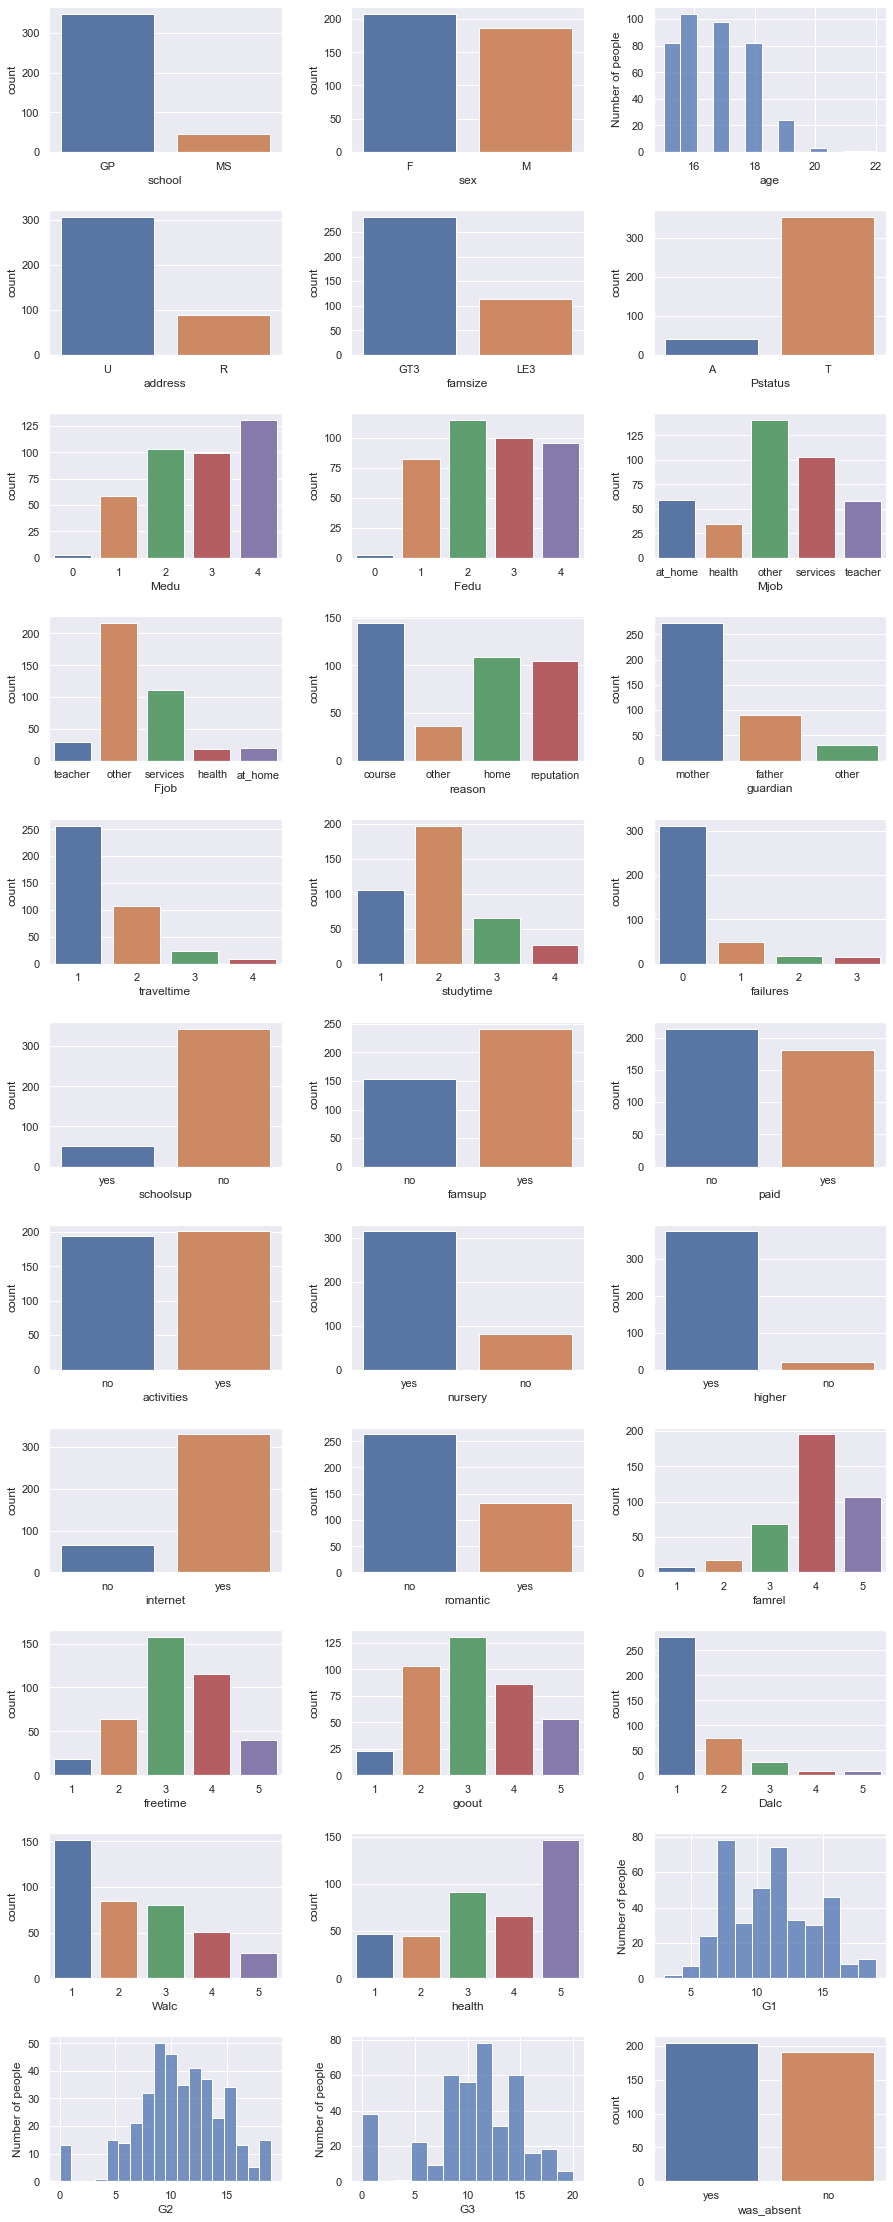

In [37]:
# Plot feature distributions

# Set the size of the entire plot (I set this by trial and error :)
fig = plt.figure(figsize=(15, 40))  

# Go through all the columns (there is 10 of them with the target)
for i, col in enumerate(orig_data.columns):
    
    sp = plt.subplot(11, 3, i+1)
    
    # Get the distinct counts of the feature
    vals = orig_data[col].value_counts(dropna=False)
    
    if len(vals) > 6:    # If the column has more than 10 distinct values, we
                          # can assume the column is not categorical
        sp.set_ylabel('Number of people')
        sns.histplot(data=orig_data, x=col)
        # plt.hist(orig_data[col], bins=30)    # Nice histogram
        
    else:    # Categorical data
        sns.countplot(data=orig_data, x=col)
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

In [6]:
orig_data['romantic'].dtype == 'object'

True

In [38]:
tmp_data = orig_data.copy()

categorical_features = [feature_name for feature_name in tmp_data.columns if tmp_data[feature_name].dtype == 'object']

for cf in categorical_features:
    tmp_data = pd.concat([tmp_data, pd.get_dummies(tmp_data[cf], prefix=cf, drop_first=True)], axis=1)

In [39]:
tmp_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,was_absent_yes
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,0,1,0,0,0,1,1,0,0,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,0,0,1,0,0,0,1,1,0,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,0,1,0,1,0,1,1,1,0,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,0,0,1,1,1,1,1,1,1,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,0,0,1,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,1,0,1,1,0,1,1,0,0,1
391,MS,M,17,U,LE3,T,3,1,services,services,...,0,0,0,0,0,0,1,1,0,0
392,MS,M,21,R,GT3,T,1,1,other,other,...,1,0,0,0,0,0,1,0,0,0
393,MS,M,18,R,LE3,T,3,2,services,other,...,0,0,0,0,0,0,1,1,0,0


In [40]:
numerical_data = tmp_data.drop(categorical_features, axis=1)
numerical_data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,was_absent_yes
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,0,0,1,1,0,0,1
1,17,1,1,1,2,0,5,3,3,1,...,0,0,1,0,0,0,1,1,0,1
2,15,1,1,1,2,3,4,3,2,2,...,0,1,0,1,0,1,1,1,0,1
3,15,4,2,1,3,0,3,2,2,1,...,0,0,1,1,1,1,1,1,1,0
4,16,3,3,1,2,0,4,3,2,1,...,0,0,1,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,1,0,1,1,0,1,1,0,0,1
391,17,3,1,2,1,0,2,4,5,3,...,0,0,0,0,0,0,1,1,0,0
392,21,1,1,1,1,3,5,5,3,3,...,1,0,0,0,0,0,1,0,0,0
393,18,3,2,3,1,0,4,4,1,3,...,0,0,0,0,0,0,1,1,0,0


In [41]:
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   famrel             395 non-null    int64
 7   freetime           395 non-null    int64
 8   goout              395 non-null    int64
 9   Dalc               395 non-null    int64
 10  Walc               395 non-null    int64
 11  health             395 non-null    int64
 12  G1                 395 non-null    int64
 13  G2                 395 non-null    int64
 14  G3                 395 non-null    int64
 15  school_MS          395 non-null    uint8
 16  sex_M              395 non-null    uint8
 17  address_U       

In [42]:
correlation = numerical_data.corr()

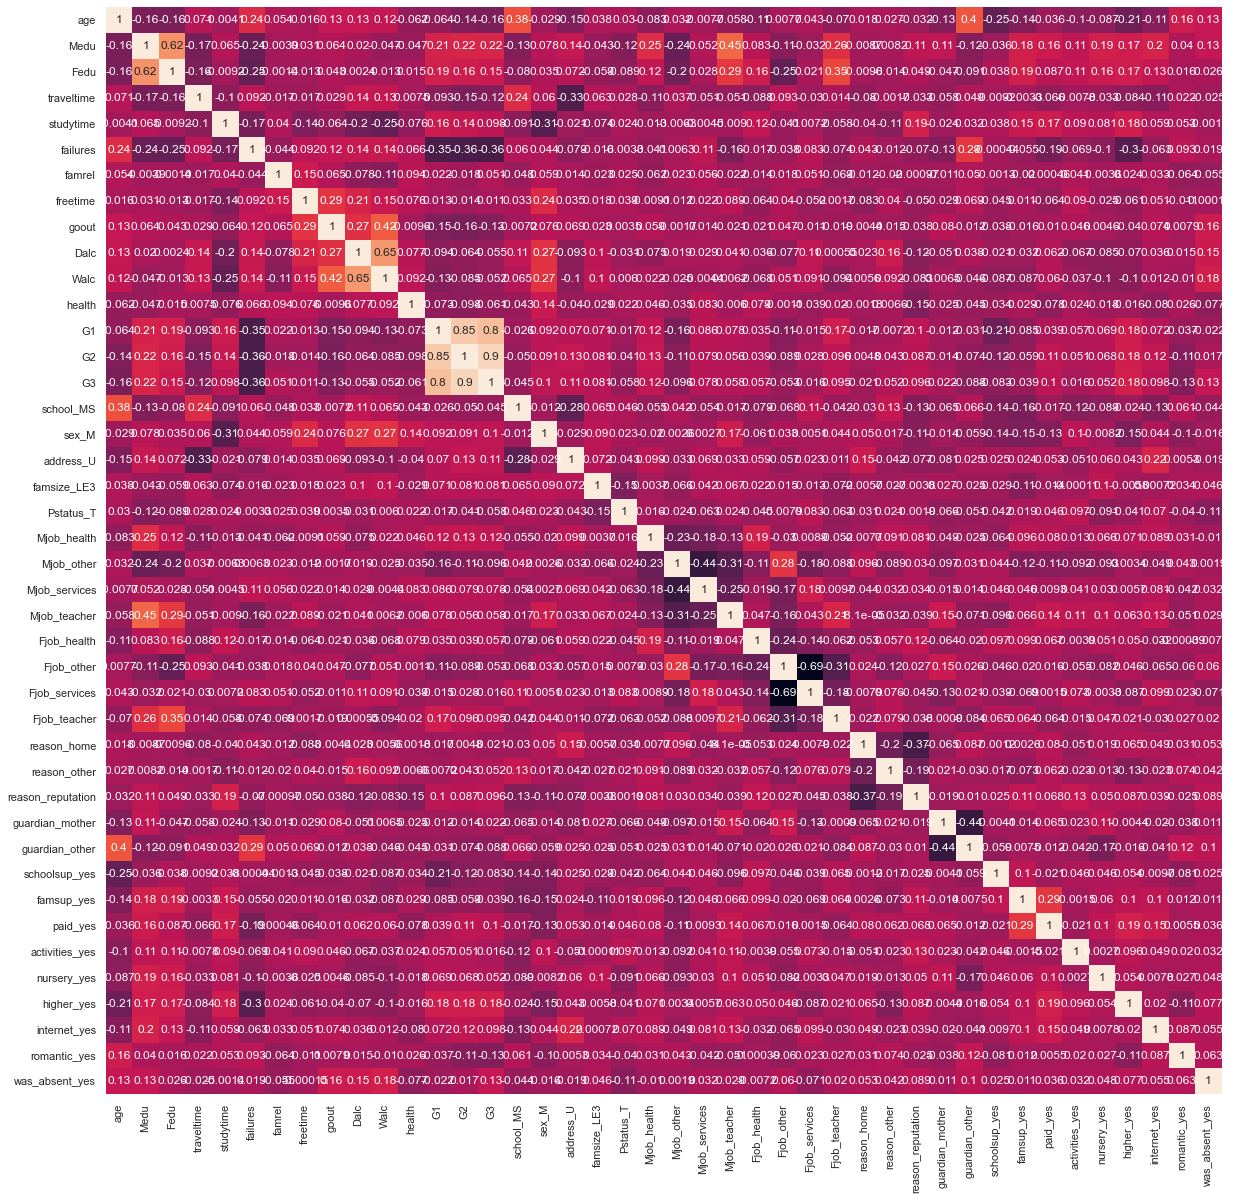

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation,   
            annot=True, 
            cbar=False
           )
plt.show()

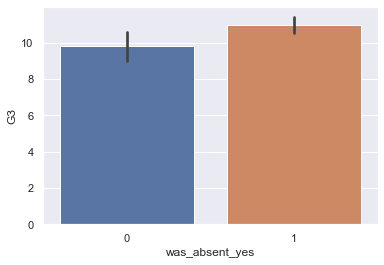

In [48]:
sns.barplot(data=numerical_data, x='was_absent_yes', y='G3')
plt.show()

In [15]:
sns.pairplot(data=numerical_data)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001EBFF95CB88> (for post_execute):


KeyboardInterrupt: 

In [16]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

In [17]:
# # Normalization

# normalizer = Normalizer().fit(X_train)

In [63]:
labels = numerical_data[['G1', 'G2', 'G3']]
features = numerical_data.drop(['G1', 'G2', 'G3'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, labels['G3'], test_size=0.25, random_state=123)

# Cast back to DataFrame
X_train = pd.DataFrame(X_train, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_train.columns)

In [64]:
X_train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,was_absent_yes
191,17,1,1,1,2,0,5,3,3,1,...,0,0,0,0,1,1,1,1,0,0
142,15,4,4,1,3,0,4,2,2,1,...,0,0,1,1,1,1,1,1,0,0
12,15,4,4,1,1,0,4,3,3,1,...,0,0,1,1,1,1,1,1,0,0
125,15,3,4,1,1,0,5,5,5,3,...,0,1,0,0,0,1,1,1,0,0
155,15,2,3,1,2,0,4,4,4,1,...,0,1,0,1,1,1,1,0,0,0


In [65]:
regr_lr = LinearRegression()
regr_lr.fit(X_train, y_train)
regr_lr.score(X_test, y_test)

0.2568962168491489

In [66]:
regr_sv = svm.SVR(kernel="poly", C=1, gamma="auto", degree=1, epsilon=2)
regr_sv.fit(X_train, y_train)
regr_sv.score(X_test, y_test)

0.17587998827452245

In [67]:
regr_dt = DecisionTreeRegressor(random_state=123)
regr_dt.fit(X_train, y_train)
regr_dt.score(X_test, y_test)

-0.11449842229818574

In [92]:
regr_rf = RandomForestRegressor(random_state=123)
regr_rf.fit(X_train, y_train)
regr_rf.score(X_test, y_test)

0.3134677516105704

In [70]:
test_labels_and_predictions = pd.DataFrame(y_test, columns=['G3'])
test_labels_and_predictions['prediction_DT'] = regr_dt.predict(X_test)
test_labels_and_predictions['prediction_RF'] = regr_rf.predict(X_test)
test_labels_and_predictions

,G3,prediction_DT,prediction_RF
252,8,14.0,9.47
236,13,7.0,10.60
275,12,8.0,10.20
148,0,15.0,12.56
309,10,11.0,10.03
...,...,...,...
121,15,14.0,10.42
337,0,10.0,11.25
38,11,11.0,10.24
178,9,10.0,11.40


<AxesSubplot:>

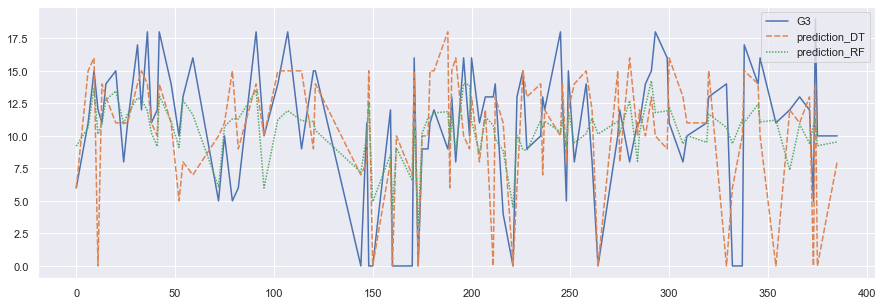

In [71]:
plt.figure(figsize=(15,5))
sns.lineplot(data=test_labels_and_predictions)

Text(0, 0.5, 'Mean decrease in impurity')

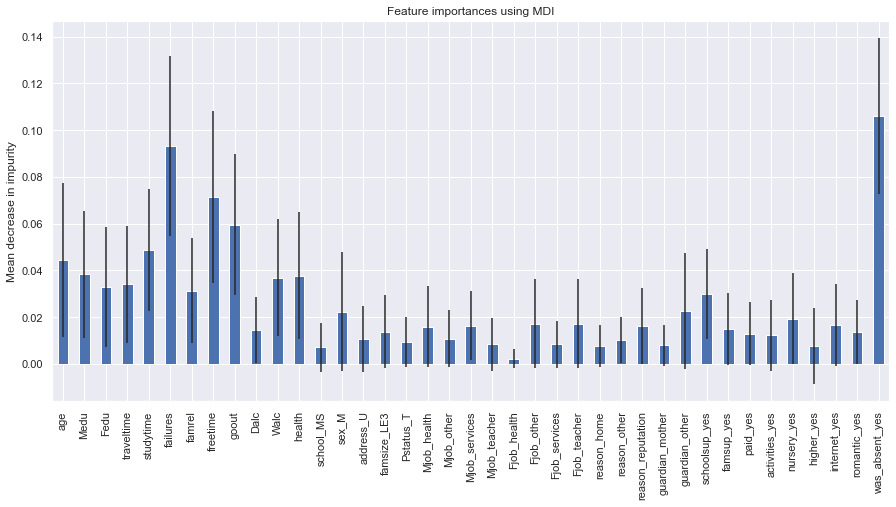

In [97]:
importances = regr_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr_rf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X_train.columns)

plt.figure(figsize=(15,7))
forest_importances.plot.bar(yerr=std)
plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in impurity")

## Dimensionality reduction

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
pca.fit(X_train)

X_train_pca = pd.DataFrame(pca.transform(X_train))
X_test_pca = pd.DataFrame(pca.transform(X_test))

X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.857800,2.231102,-0.324393,-0.400086,-1.112494,-0.240525,-0.906167,-0.000795,0.501918,-0.925628,0.100015,1.145497,-0.167230,0.544999,0.190148
1,-2.617399,-2.289781,-1.401451,0.558536,0.674082,-0.370619,-0.352971,0.554434,0.691602,0.145216,0.075004,0.699927,-0.181359,-0.109734,-0.102425
2,-0.296727,-2.952609,-1.076482,-0.240147,0.302096,0.713198,-0.618776,-0.401161,0.425936,-0.691551,-0.225208,0.223303,-0.662751,-0.282031,-0.681882
3,1.281885,-2.636917,-0.947117,-0.134710,-2.214774,0.970554,-0.529354,-0.570647,1.203526,-0.727410,0.893791,0.823976,1.576617,-0.029338,0.077686
4,-1.556277,-0.169661,1.934879,-1.355498,-1.902025,0.341099,-0.197442,-0.617392,0.447763,-0.712940,1.089184,0.456198,-0.080475,0.401092,0.336338


In [82]:
pca.n_components

15

In [83]:
pca.explained_variance_ratio_.sum()

0.83841316906375

In [90]:
regr_rf = svm.SVR()
regr_rf.fit(X_train_pca, y_train)
regr_rf.score(X_test_pca, y_test)

0.1120746426721565